<a href="https://colab.research.google.com/github/yogesh1300/Codsoft/blob/main/credit_card_fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Loaded dataset with shape: (3973, 31)
Class
0.0    3970
1.0       2
Name: count, dtype: int64

Confusion Matrix:
 [[0 0]
 [1 0]]

Classification Report:
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       0.0
         1.0       0.00      0.00      0.00       1.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

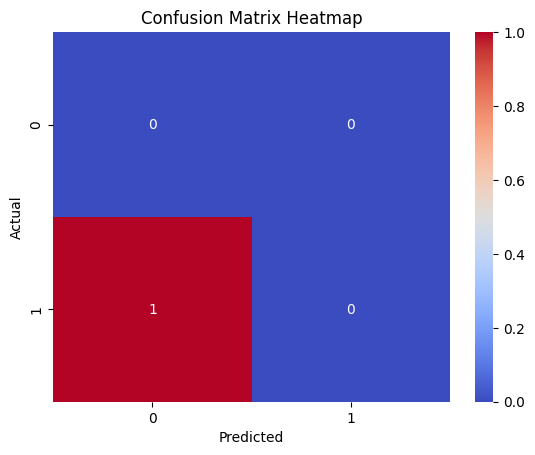

In [ ]:
# Credit Card Fraud Detection - By Yogesh,

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Load the data
df = pd.read_csv("creditcard.csv")
print("Loaded dataset with shape:", df.shape)

# Step 2: Basic understanding
print(df['Class'].value_counts())  # 0 = normal, 1 = fraud

# Step 3: Normalize 'Amount' column only (others are already scaled)
df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Time', 'Amount'], axis=1)

# Step 4: Split features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Step 5: Handle imbalance using undersampling (easy for beginners)
fraud = df[df['Class'] == 1]
nonfraud = df[df['Class'] == 0].sample(n=len(fraud), random_state=42)
balanced_df = pd.concat([fraud, nonfraud])

X_bal = balanced_df.drop('Class', axis=1)
y_bal = balanced_df['Class']

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.25, random_state=42)

# Step 7: Train a simple Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Predict and evaluate
y_pred = model.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Optional: Visualizing the results
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="coolwarm")
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
